# **Speech Processing Lab 5: Phase-II**

Rishabh Tripathi (180030036)

## **Aim**
* To study different sound units present in majority of Indian languages.
* To understand the production mechanism of each sound unit.
* To learn the time domain and frequency domain characteristics of different sound units.


## **Theory**
The sound units of most languages in India are broadly classified into two categories, namely, vowels and consonants. These two broad categories are mainly based on the shape of the vocal tract. In case of vowels, the vocal tract shape is wide open without any constriction along its length starting from the glottis till the lips and is excited by voiced excitation source. Alternatively, in case of consonants, their may be constriction in vocal tract shape some where along its length and is excited by either voiced, unvoiced and both types of excitation.

### **Nasals**
Nasal sounds are similar to vowels having lower formant energy compared to vowels. Nasal sounds are produced with the help of air flow in nasal cavity.

### **Semi-Vowels**
The semivowels are weakly periodic as compared to the vowels and having lower energy as compared to vowels. The set of semivowels in Indian language include /y/, /r/, /l/ and /v/. Among these, /y/ and /r/ are aspirated and /l/ and /v/ are unaspirated.

### **Fricatives**
The fricatives are the consonants produced by a narrow constriction somewhere along the length of the vocal tract. The basic difference between fricatives and stop consonants is that the closure will be partial & narrow in case of fricatives & is complete in case of stop consonants. Depending on the place of narrow constrictions, we have different fricatives. In case of most Indian languages we have |s|, |sh|, |shh| & |h| as the fricatives. |s| is a dental fricative, |sh| is an alveolar fricative, |shh| is also an alveolar fricative but with more stress and |h| is a velar fricative.

### **Affricates**
The affricates are the consonants where the production involves combination of stop and fricative consonant production. Initially, the vocal tract will be completely closed somewhere all the length to create a total constrictions. After this, the constriction will be partially released to create a fricative excitations. Most of the Indian languages have |ch|, |chh|, |j| & |jh| as the affricate consonants. All these affricates are produced at the palatal region. The difference across different affricates is due to different MOA.

In [ ]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq,fftshift
from scipy import signal
from scipy.io import wavfile
import librosa
import librosa.display
from matplotlib import cm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/Speech\ Processing\ Lab/Lab\ 5.2
!ls

/content/drive/MyDrive/Speech Processing Lab/Lab 5.2
affricate_ch.wav  fricative_s.wav  nasal_n.wav	  semivow_r.wav
fricative_h.wav   nasal_m.wav	   semivow_l.wav


In [ ]:
# Function to plot the waveform
def wave_plot(sound, sound_name):
    t = np.arange(0, sound.shape[0]/fs, 1/fs)
    plt.figure(figsize=(15,5))
    plt.plot(t, sound)
    plt.title("Time Domain Plot of sound "+ "/" + sound_name + "/")
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
# Function to plot the magnitude spectrum
def plot_spectrum(sound, sound_name):
    
    # Getting the Discrete Fourier Transform of the sound
    total_len = sound.shape[0]
    audio_fft = fft(sound)/total_len

    f_array = fftfreq(total_len, 1/fs)
    
    plt.figure(figsize=(15,5))
    plt.plot(f_array[0:total_len//2], 2*np.abs(audio_fft[0:total_len//2]))
    plt.title("Magnitude Spectrum of "+ "/" + sound_name + "/")
    plt.yscale('log')
    plt.xlim((0, 10000))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.show()

In [ ]:
# Function to plot the spectrogram
def plot_spectrogram(sound, sound_name, frame_rate=8):

    D = librosa.stft(sound, n_fft=512, win_length=128, hop_length=frame_rate)  # STFT
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    plt.figure(figsize=(20,5))
    librosa.display.specshow(S_db, x_axis='s', y_axis='linear', sr=fs, hop_length=frame_rate, cmap=cm.gnuplot2)
    plt.title("Spectrogram of "+ "/" + sound_name + "/")
    plt.colorbar()
    plt.show()

## **Problem C**
Nasals
1. Record the sounds of any two nasal sounds and plot their time domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the above plots and write your observations. Also, comment on how they compare to vowel sounds.


### **Procedure**
1. Record the 2 nasal sounds using WaveSurfer and save the .wav files in Google Drive.
2. Load the 2 audio files using Librosa library.
3. We use the 3 functions defined above to plot the waveform, magnitude spectrum and the spectrogram for the audio files.

In [ ]:
# Loading the audio files
nasal_n, fs = librosa.load("nasal_n.wav", sr = 16000)
nasal_m, fs = librosa.load("nasal_m.wav", sr = 16000)

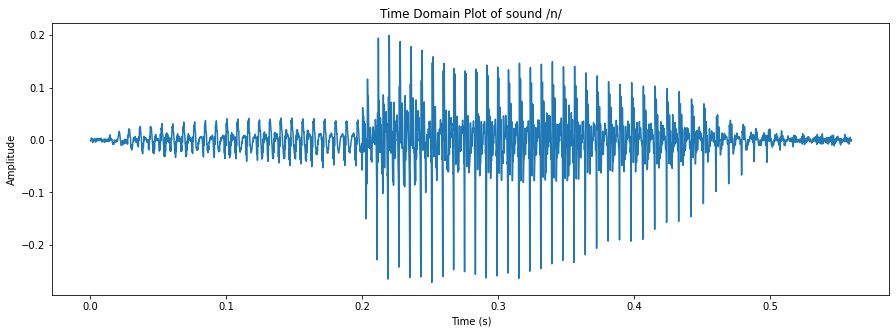

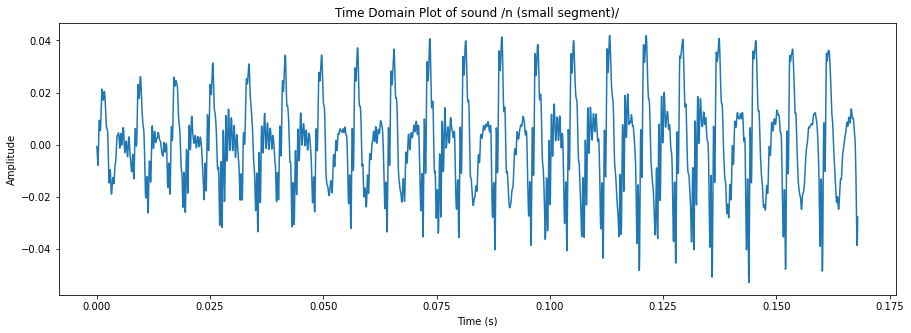

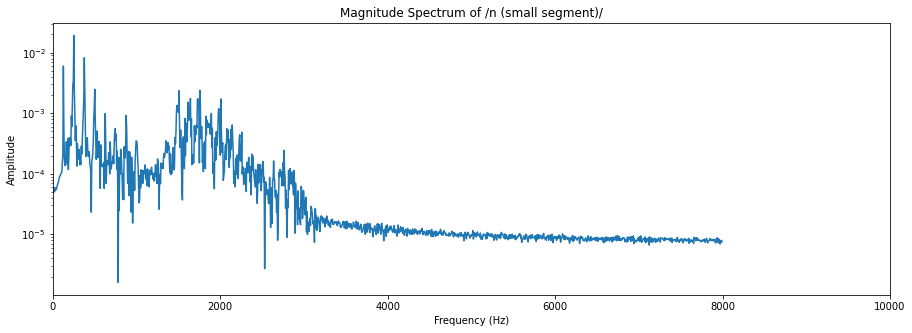

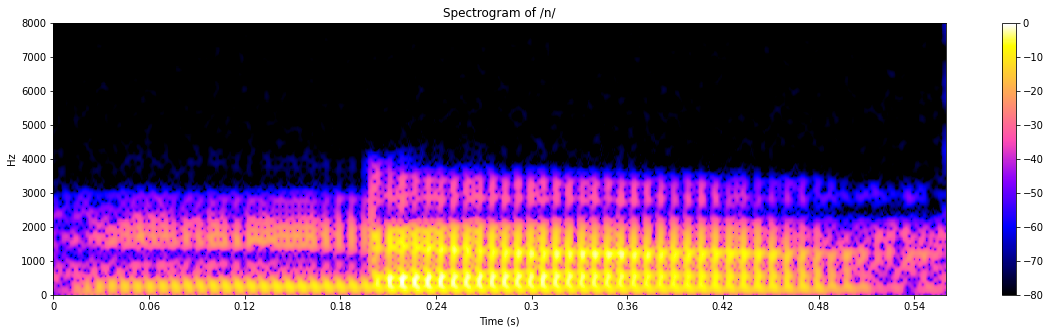

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |n|

# n -> 0.027s to 0.195s
wave_plot(nasal_n, "n")
wave_plot(nasal_n[int(0.027*fs):int(0.195*fs)], "n (small segment)")
plot_spectrum(nasal_n[int(0.027*fs):int(0.195*fs)], "n (small segment)")
plot_spectrogram(nasal_n, "n")

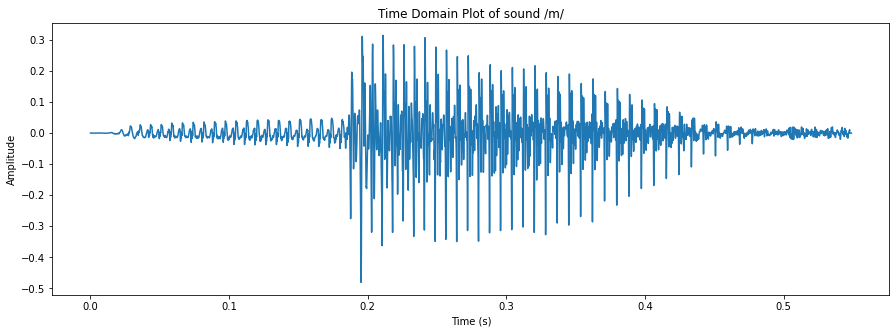

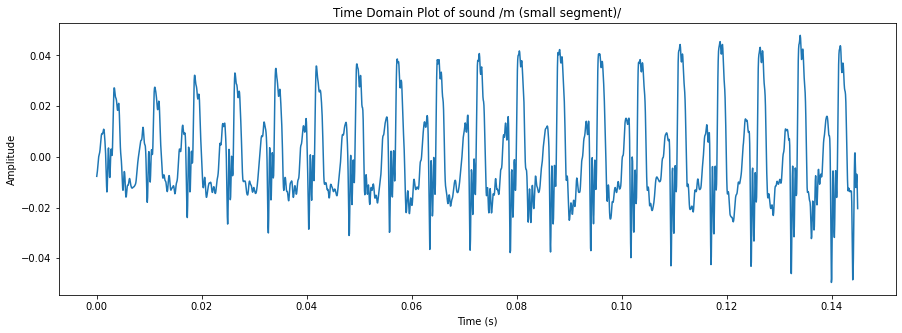

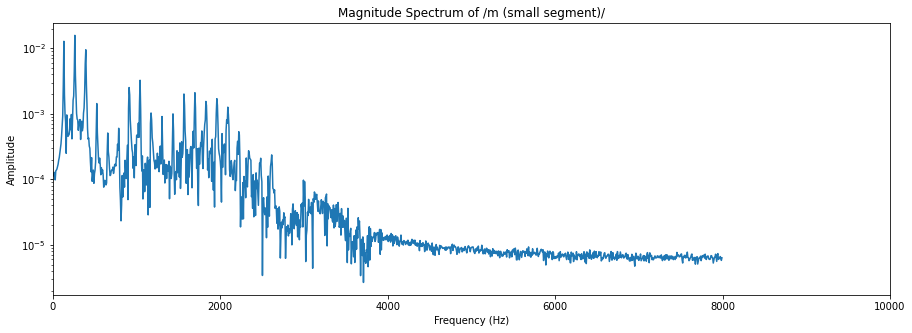

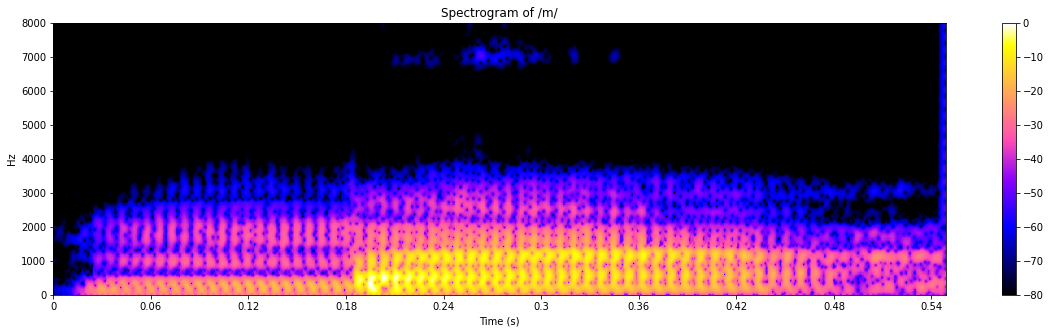

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |m|

# m -> 0.040s to 0.185s
wave_plot(nasal_m, "m")
wave_plot(nasal_m[int(0.040*fs):int(0.185*fs)], "m (small segment)")
plot_spectrum(nasal_m[int(0.040*fs):int(0.185*fs)], "m (small segment)")
plot_spectrogram(nasal_m, "m")

### **Observations**
1. We observe low frequency content in both nasal sounds |n| and |m|.
2. The magnitude spectrum (and the spectrogram) shows anti-resonance bands in both sounds as we see sudden drop in energy for some frequencies.

## **Problem D**
Semi-Vowels
1. Record the sounds of any two semi-vowels and plot their time domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the above plots and write your observations. Comment on how these vary from the vowel sounds.


### **Procedure**
1. Record the 2 semi-vowel sounds using WaveSurfer and save the .wav files in Google Drive.
2. Load the 2 audio files using Librosa library.
3. We use the 3 functions defined above to plot the waveform, magnitude spectrum and the spectrogram for the audio files.

In [ ]:
# Loading the audio files
semivow_r, fs = librosa.load("semivow_r.wav", sr = 16000)
semivow_l, fs = librosa.load("semivow_l.wav", sr = 16000)

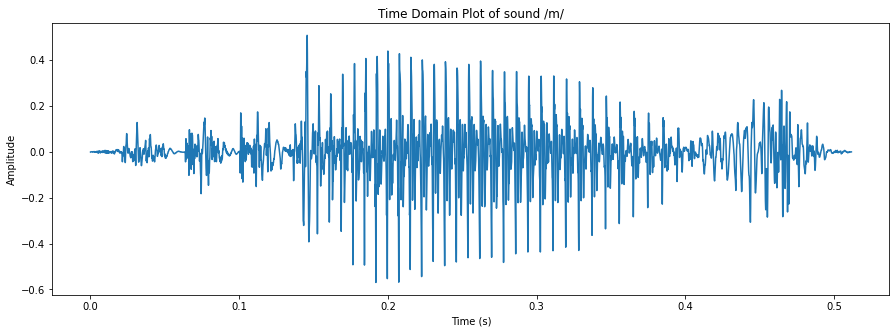

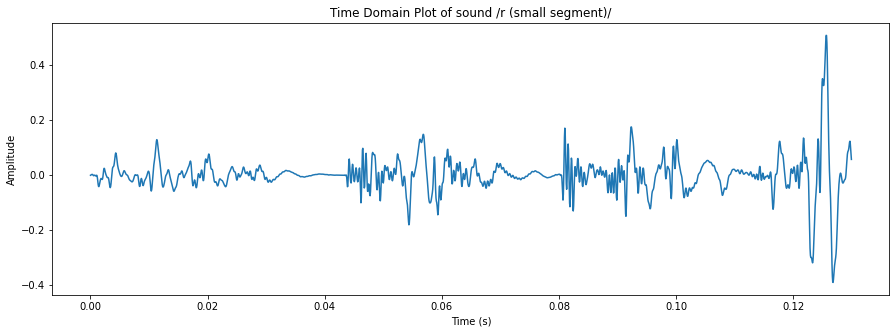

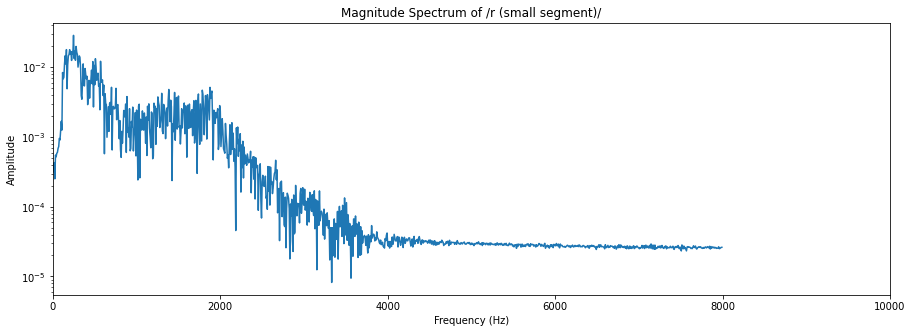

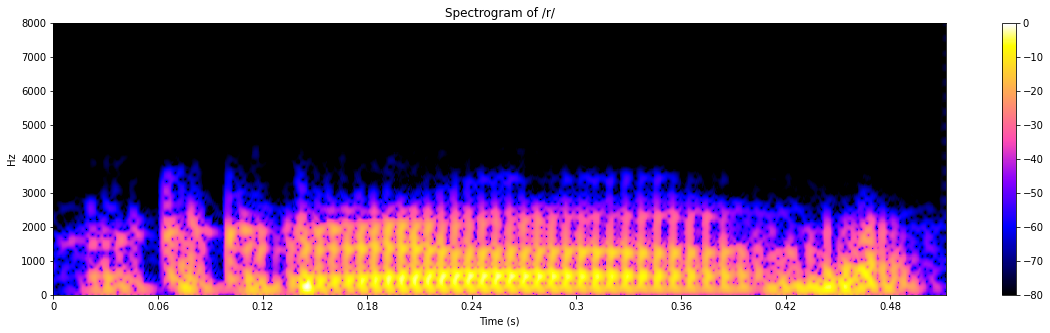

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |r|

# r -> 0.020s to 0.150s
wave_plot(semivow_r, "m")
wave_plot(semivow_r[int(0.020*fs):int(0.150*fs)], "r (small segment)")
plot_spectrum(semivow_r[int(0.020*fs):int(0.150*fs)], "r (small segment)")
plot_spectrogram(semivow_r, "r")

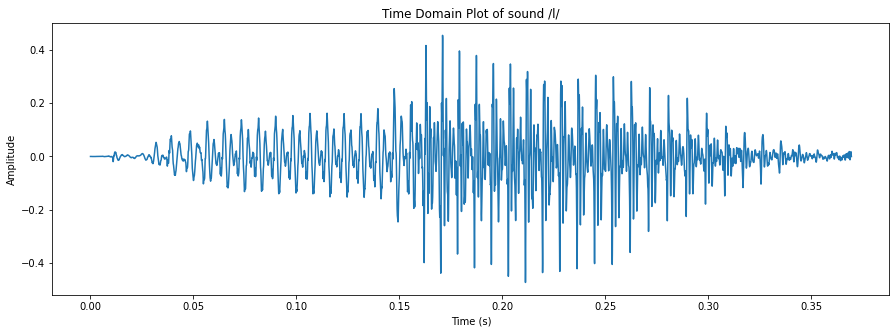

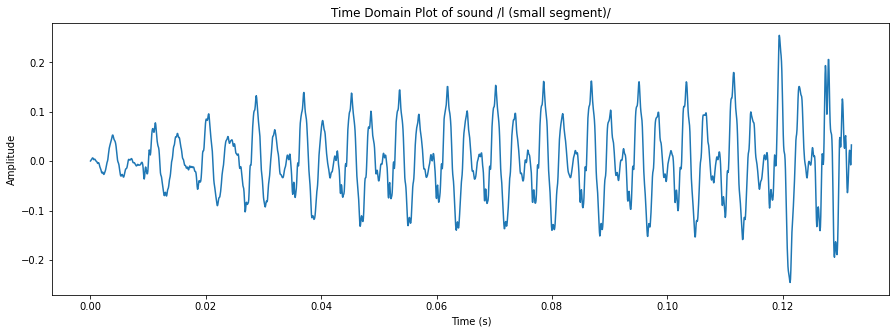

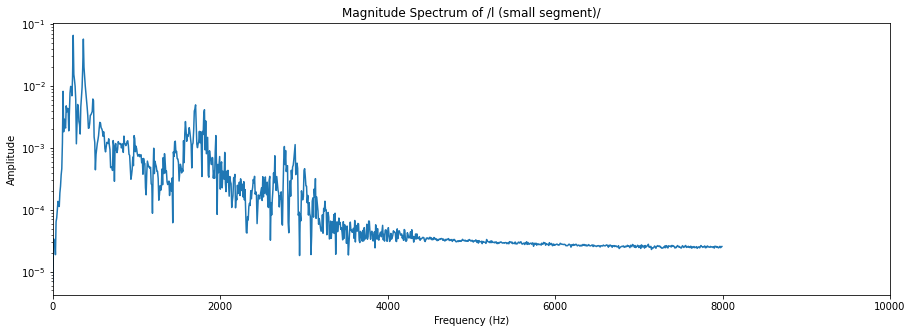

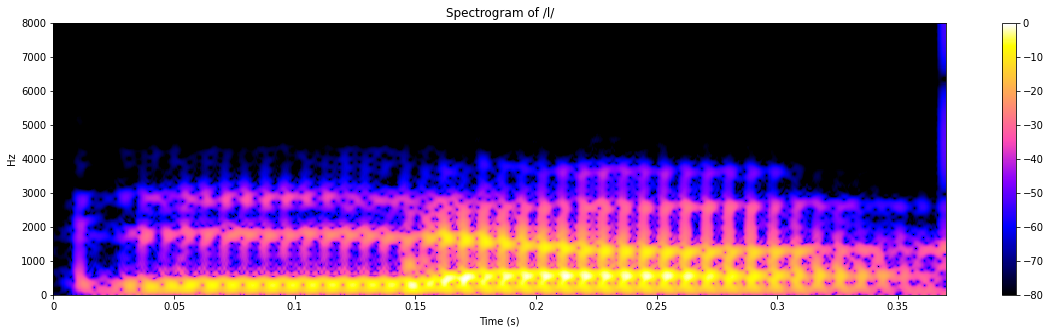

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |l|

# l -> 0.028s to 0.160s
wave_plot(semivow_l, "l")
wave_plot(semivow_l[int(0.028*fs):int(0.160*fs)], "l (small segment)")
plot_spectrum(semivow_l[int(0.028*fs):int(0.160*fs)], "l (small segment)")
plot_spectrogram(semivow_l, "l")

### **Observations**
1. The semi-vowel sound |r| and |l| both have periodicity similar to vowels.
2. The sound |r| has more frication as compared to the sound |l|.

## **Problem E**
Fricatives
1. Pick up any two fricatives having different positions of constrictions. Record these sounds and plot the time-domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the above plots and write your observations.


### **Procedure**
1. Record the 2 fricative sounds using WaveSurfer and save the .wav files in Google Drive.
2. Load the 2 audio files using Librosa library.
3. We use the 3 functions defined above to plot the waveform, magnitude spectrum and the spectrogram for the audio files.

In [ ]:
# Loading the audio files
fricative_s, fs = librosa.load("fricative_s.wav", sr = 16000)
fricative_h, fs = librosa.load("fricative_h.wav", sr = 16000)

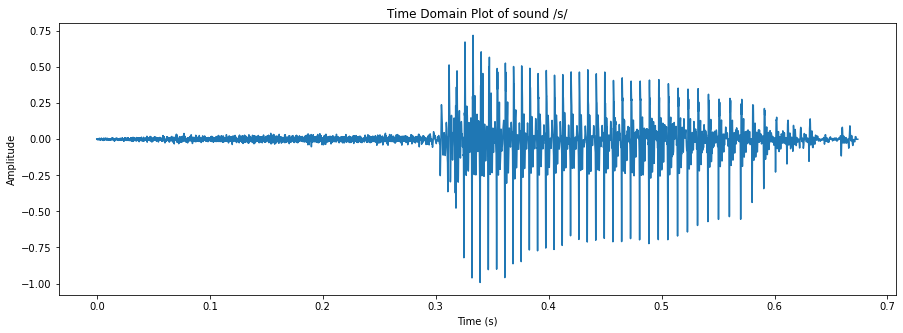

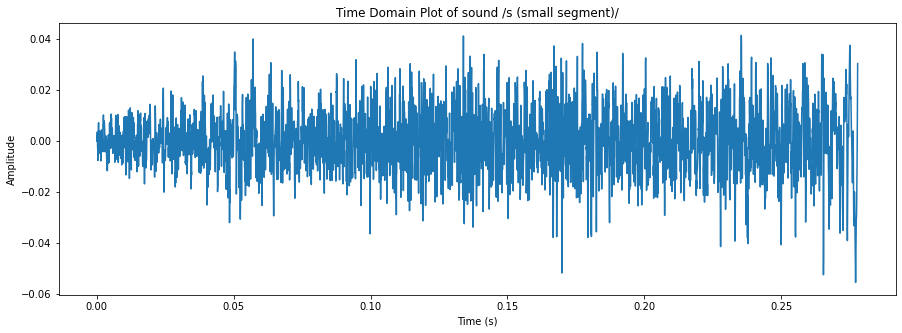

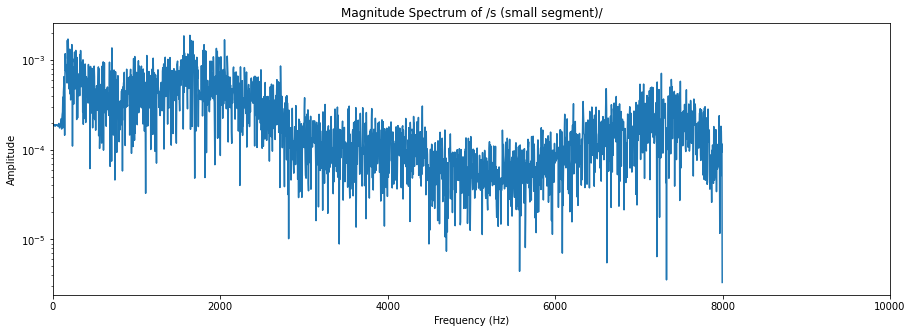

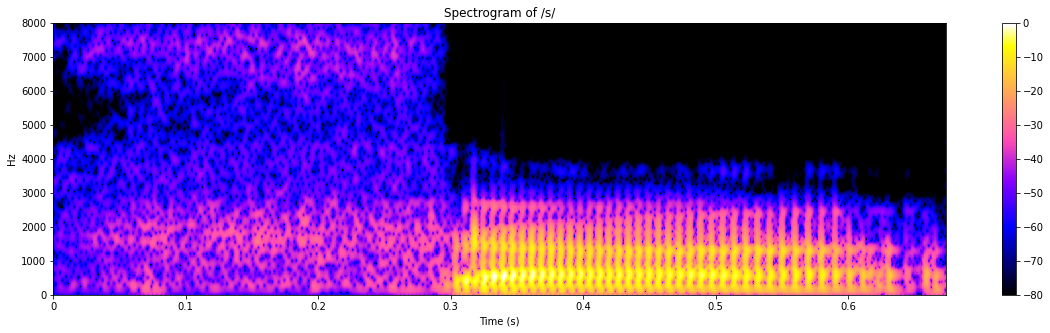

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |s|

# s -> 0.020s to 0.298s
wave_plot(fricative_s, "s")
wave_plot(fricative_s[int(0.020*fs):int(0.298*fs)], "s (small segment)")
plot_spectrum(fricative_s[int(0.020*fs):int(0.298*fs)], "s (small segment)")
plot_spectrogram(fricative_s, "s")

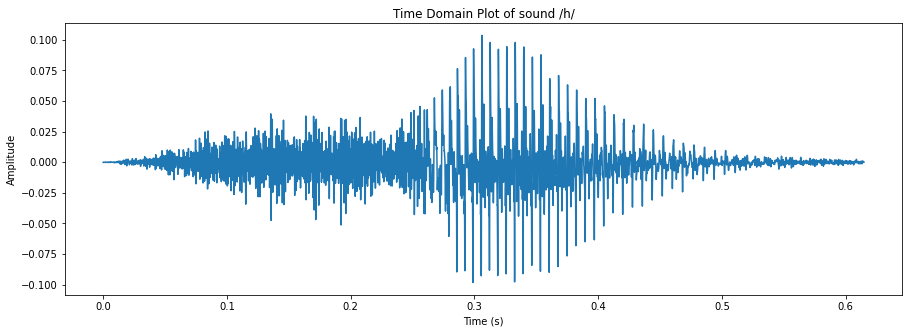

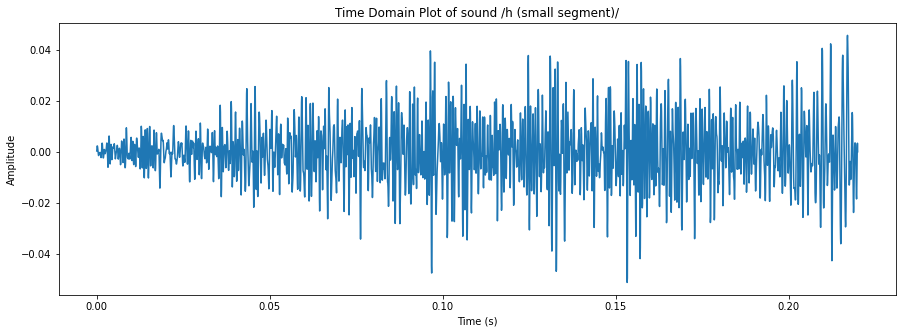

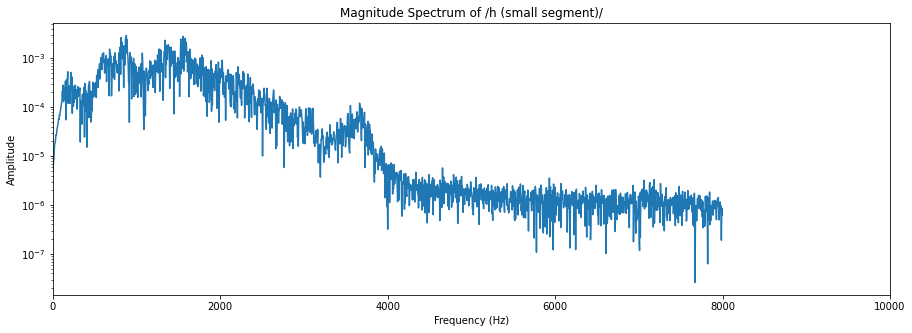

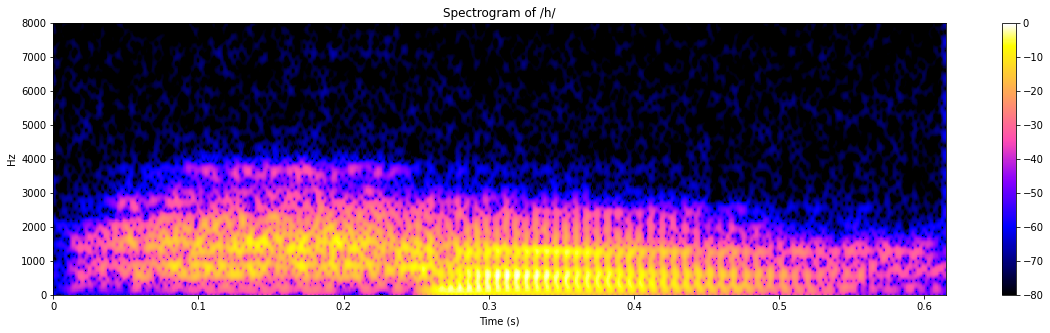

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |h|

# h -> 0.039s to 0.259s
wave_plot(fricative_h, "h")
wave_plot(fricative_h[int(0.039*fs):int(0.259*fs)], "h (small segment)")
plot_spectrum(fricative_h[int(0.039*fs):int(0.259*fs)], "h (small segment)")
plot_spectrogram(fricative_h, "h")

### **Observations**
1. The fricative |s| and |h| both have long duration of frication.
2. Sound |s| has more energy in the higher frequency whereas |h| has more energy in the lower (relatively) frequency region.


## **Problem F**
Affricates
1. Record any one affricate sound and plot the time domain waveform, the magnitude spectrum and the spectrogram.
2. Inspect the plots and write down your observations. 


### **Procedure**
1. Record the 1 affricate sounds using WaveSurfer and save the .wav files in Google Drive.
2. Load the 1 audio files using Librosa library.
3. We use the 3 functions defined above to plot the waveform, magnitude spectrum and the spectrogram for the audio files.

In [ ]:
# Loading the audio files
affricate_ch, fs = librosa.load("affricate_ch.wav", sr = 16000)

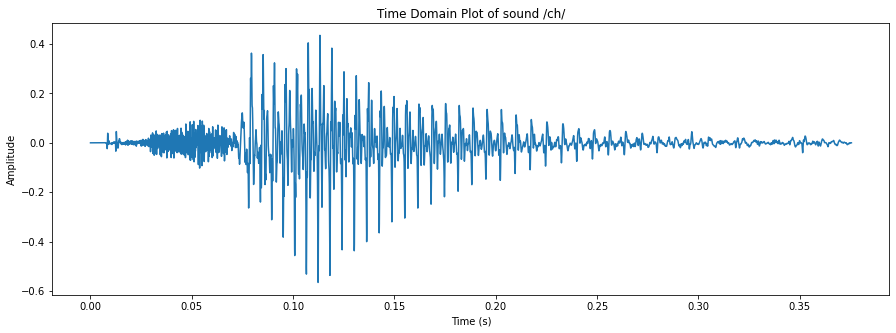

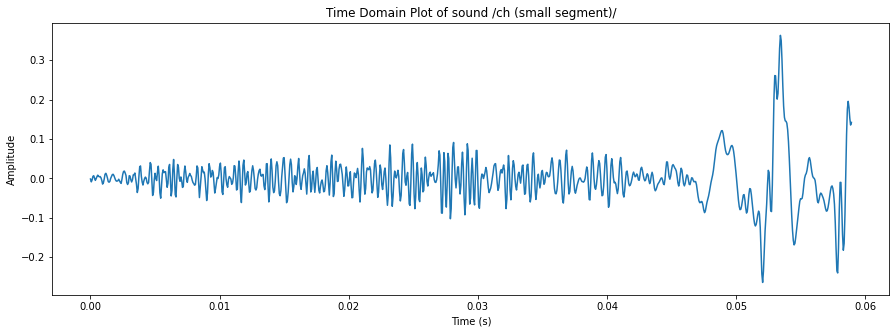

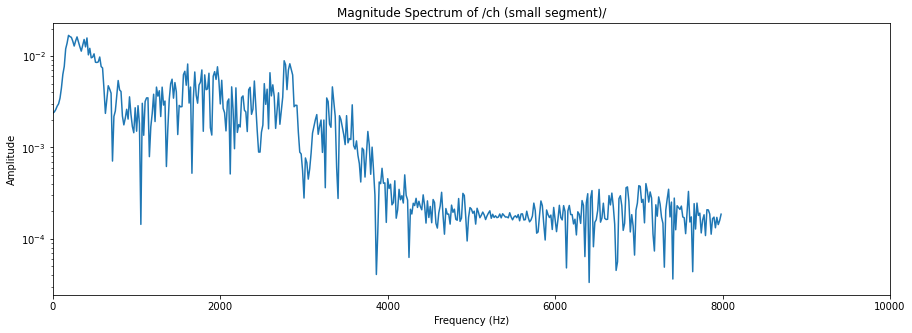

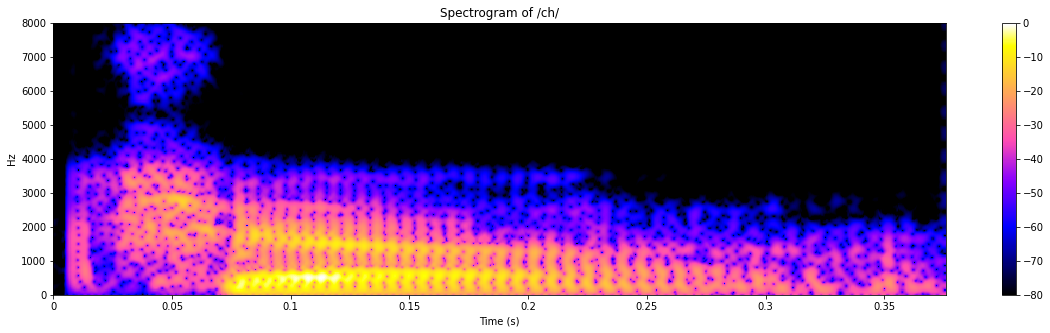

In [ ]:
# Use WaveSurfer to identify the segment where we get the sound |ch|

# ch -> 0.026s to 0.085s
wave_plot(affricate_ch, "ch")
wave_plot(affricate_ch[int(0.026*fs):int(0.085*fs)], "ch (small segment)")
plot_spectrum(affricate_ch[int(0.026*fs):int(0.085*fs)], "ch (small segment)")
plot_spectrogram(affricate_ch, "ch")

### **Observations**
1. The sound |ch| has frication in the beginning, as observed in the spectrogram.
2. It also has closure, burst and frication just like the stop consonants. 